# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

i = 1

cit = []
lat = [] 
lng = []
max_temp = []
humidity = [] 
cloudiness = [] 
windspeed = []
country = [] 
date = []


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {i} of Set 1 | {city}")
        cit.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        i += 1

    except KeyError:
        print("key not found")
        pass
print("-"*45)
print("Data Retrieval Complete")   
print("-"*45)

Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | malwan
key not found
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | bahia blanca
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | fairlie
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | cascavel
Processing Record 15 of Set 1 | tanggu
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | catamarca
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | arman
Processing Record 22 of Set 1 | airai
Processing Record 23 of Set 1 | illoqqort

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cit, lat, lng, max_temp, humidity, cloudiness, windspeed, country, date
weather_dict = {
    "City": cit,
    "Lat": lat,
    "Lng": lng,   
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,293.68,39,0,1.79,US,1665387064
1,Castro,-24.7911,-50.0119,286.47,98,100,4.01,BR,1665387065
2,Yellowknife,62.4560,-114.3525,281.44,93,75,4.63,CA,1665386878
3,Port Alfred,-33.5906,26.8910,295.47,73,98,3.13,ZA,1665387066
4,George Town,5.4112,100.3354,305.11,72,20,5.14,MY,1665387028
...,...,...,...,...,...,...,...,...,...
555,Broome,42.2506,-75.8330,281.03,87,58,1.66,US,1665387277
556,Östersund,63.1792,14.6357,282.93,71,40,3.60,SE,1665387139
557,Matagami,49.7502,-77.6328,274.21,93,100,2.06,CA,1665387158
558,Richards Bay,-28.7830,32.0377,298.07,56,73,4.65,ZA,1665387278


In [5]:
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.830540,15.665462,289.805161,70.110714,56.669643,3.765607,1.665387e+09
std,33.640713,90.707285,10.300319,23.098650,40.245799,2.801627,8.836997e+01
min,-54.800000,-175.200000,258.490000,5.000000,0.000000,0.000000,1.665387e+09
25%,-6.484950,-65.132375,282.175000,58.000000,13.000000,1.657500,1.665387e+09
50%,26.074950,18.950950,291.150000,75.000000,72.000000,3.090000,1.665387e+09
75%,50.111825,98.708225,298.375000,88.000000,100.000000,5.105000,1.665387e+09
max,78.218600,179.316700,311.140000,100.000000,100.000000,17.960000,1.665387e+09


In [6]:
import os 
import csv
weather_data.to_csv(r"../output_data/cities.csv", index = False)  

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

high_humid = weather_data[weather_data["Humidity"] > 100]
high_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

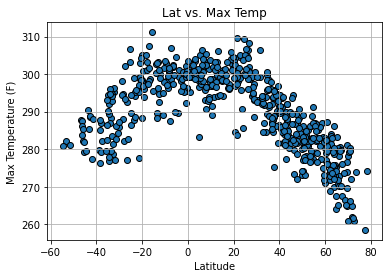

In [9]:
Latitude = weather_data["Lat"]
Temperature = weather_data["Max Temp"]

# Create Graph
plt.scatter(Latitude, Temperature, edgecolors= "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Lat vs. Max Temp")

plt.savefig('../output_data/figure1.png')
plt.show()

In [10]:
#The code is analyzing the differences in max temp in regards to latitude. 


## Latitude vs. Humidity Plot

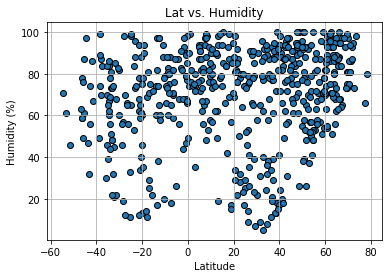

In [11]:

humid = weather_data["Humidity"]

# Create Graph
plt.scatter(Latitude, humid, edgecolors= "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Lat vs. Humidity")

plt.savefig('../output_data/figure2.png')
plt.show()

In [12]:
#The code is analyzing the differences in humidity in regards to latitude. 

## Latitude vs. Cloudiness Plot

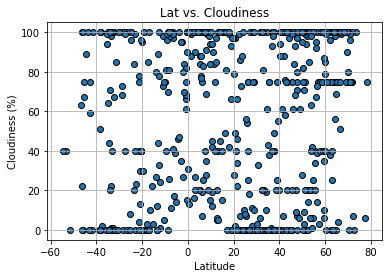

In [13]:

Cloud = weather_data["Cloudiness"]

# Create Graph
plt.scatter(Latitude, Cloud, edgecolors= "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Lat vs. Cloudiness")

plt.savefig('../output_data/figure3.png')
plt.show()

In [14]:
#The code is analyzing the differences in cloudiness in regards to latitude. 

## Latitude vs. Wind Speed Plot

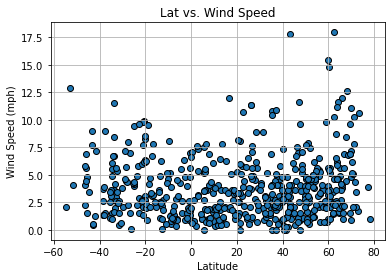

In [15]:
wind = weather_data["Wind Speed"]

# Create Graph
plt.scatter(Latitude, wind, edgecolors= "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Lat vs. Wind Speed")

plt.savefig('../output_data/figure4.png')
plt.show()

In [16]:
#The code is analyzing the differences between wind speed in regards to latitiude. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8559740476807222


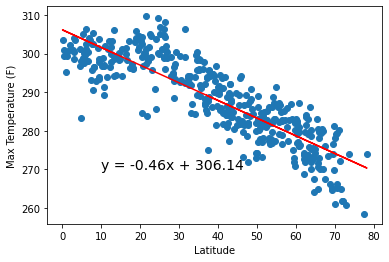

In [17]:
northern_hem = weather_data[weather_data["Lat"] >= 0]

northern_temp = northern_hem["Max Temp"]
northern_lat = northern_hem["Lat"]

plt.scatter(northern_lat,northern_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_temp)
regress_values = northern_lat * slope + intercept
plt.plot(northern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (10,270), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.672374882317118


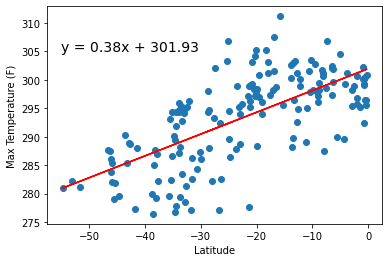

In [18]:
southern_hem = weather_data[weather_data["Lat"] < 0]

southern_temp = southern_hem["Max Temp"]
southern_lat = southern_hem["Lat"]

plt.scatter(southern_lat, southern_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_temp)
regress_values = southern_lat * slope + intercept
plt.plot(southern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,305), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

In [19]:
#The linear regression is showing a negative correlation between max temp and latitude in the northern hem but a positive correlation in the southern hem. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11190984745928621


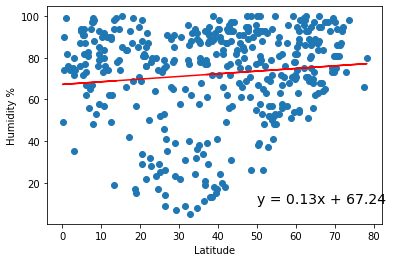

In [20]:


northern_humid = northern_hem["Humidity"]


plt.scatter(northern_lat, northern_humid)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humid)
regress_values = northern_lat * slope + intercept
plt.plot(northern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50,10), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14158801440703603


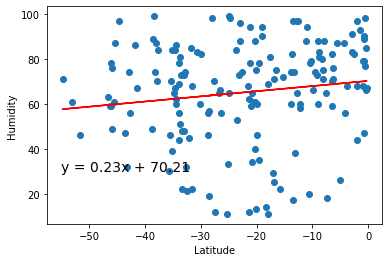

In [21]:


southern_humid = southern_hem["Humidity"]


plt.scatter(southern_lat, southern_humid)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humid)
regress_values = southern_lat * slope + intercept
plt.plot(southern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,30), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

In [22]:
#The linear regression model seems to show no strong correlation between humidity and latitude in both 
#the northern and southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13297986334788262


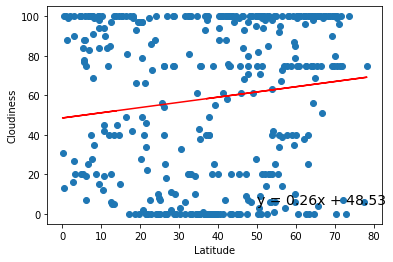

In [23]:
northern_cloudiness = northern_hem["Cloudiness"]


plt.scatter(northern_lat, northern_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
plt.plot(northern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50,5), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13644340105231395


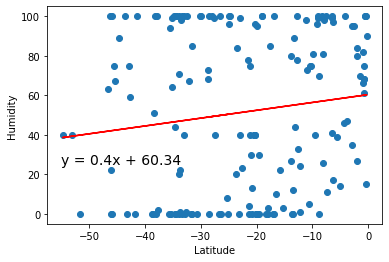

In [24]:
southern_cloudiness = southern_hem["Cloudiness"]

plt.scatter(southern_lat, southern_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
plt.plot(southern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,25), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

In [25]:
#The linear regression model seems to show no strong correlation between cloudiness and latitude in both 
#the northern and southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18645626816209734


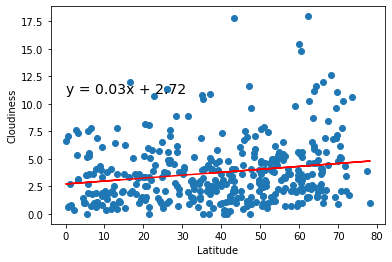

In [26]:
northern_windspeed = northern_hem["Wind Speed"]


plt.scatter(northern_lat, northern_windspeed)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_windspeed)
regress_values = northern_lat * slope + intercept
plt.plot(northern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,11), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2242786467585764


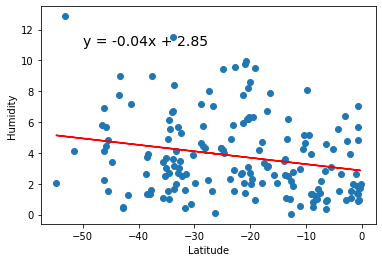

In [27]:
southern_windspeed = southern_hem["Wind Speed"]

plt.scatter(southern_lat, southern_windspeed)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_windspeed)
regress_values = southern_lat * slope + intercept
plt.plot(southern_lat, regress_values, color = "red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,11), fontsize = 14, color = "black")
print(f"The r-value is: {rvalue}")

plt.show()

In [28]:
#The linear regression model seems to show no strong correlation between cloudiness and latitude in both 
#the northern and southern hemisphere. 

In [29]:
#Analysis
#Temperature is the only thing that can be predicted based off latitude since they have a strong correlation. 
#Cloudiness vs latitude tends to produce the most spread out data point, therefore there is very little correlation. 
#Humididty is most likely to be above 50 percent across all latitudes. 
